This fill will only have EDA and preprocessing. Will do train test split and save them as 2 files to use in the 3 other notebooks - Count, tfidf, and word2vec.

# Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import string

In [ ]:
import pandas as pd

df = pd.read_csv("NEWS_YAHOO_stock_prediction.csv")
df.head()

,Unnamed: 0,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
0,0,AAPL,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
1,1,AAPL,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2,2,AAPL,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
3,3,AAPL,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
4,4,AAPL,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0


In [ ]:
new_df = df[['Date','category', 'title', 'content','Volume' , 'label']]
new_df.head()

new_df["sentiment"] = pd.NA
new_df.head()

<ipython-input-8-24a6034508c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["sentiment"] = pd.NA


,Date,category,title,content,Volume,label,sentiment
0,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,161940000,0,<NA>
1,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,161940000,0,<NA>
2,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,161940000,0,<NA>
3,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,161940000,0,<NA>
4,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,161940000,0,<NA>


# Data Preprocessing

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def remove_punctuation(text):
  text = re.sub(r'[^\w\s]', '', text)
  return text

def tokenize_and_remove_stopwords(text):
  tokenized_text = word_tokenize(text)
  filtered_text = [token for token in tokenized_text if token not in stop_words]
  return " ".join(filtered_text)

def lemmatize_text(text):
  text = tokenize_and_remove_stopwords(text)
  tokens = text.split()
  lemmas = [wnl.lemmatize(token) for token in tokens]
  return " ".join(lemmas)

Removing stopwords, tokenizing, lemmatizing.

In [ ]:
title_list = new_df["title"]

train_cleaned_titles = [remove_punctuation(i.lower()) for i in title_list]
train_lemmatized_titles = [lemmatize_text(i) for i in train_cleaned_titles]

final_cleaned_titles = train_lemmatized_titles
print(final_cleaned_titles[:10])

['apple set beat q1 earnings estimate tech etf buy', 'tech daily intel result netflix surge apple valuation google atvi deal', '7 monster stock market prediction week january 27', 'apple earnings preview 5g launch expanding service business fuel growth', 'buy surging apple microsoft stock quarterly earnings', 'top stock analyst report merck broadcom sanofi', 'stock europe seen opening lower virus concern intensify', 'intelligent system win bullish rating btig apple card role', 'stock buy list already run 100', 'previewing tech sector earnings']


In [ ]:
new_df["cleaned title"] = final_cleaned_titles
new_df.head()

<ipython-input-11-58f6a91a3a10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["cleaned title"] = final_cleaned_titles


,Date,category,title,content,Volume,label,sentiment,cleaned title
0,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,161940000,0,<NA>,apple set beat q1 earnings estimate tech etf buy
1,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,161940000,0,<NA>,tech daily intel result netflix surge apple va...
2,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,161940000,0,<NA>,7 monster stock market prediction week january 27
3,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,161940000,0,<NA>,apple earnings preview 5g launch expanding ser...
4,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,161940000,0,<NA>,buy surging apple microsoft stock quarterly ea...


In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
new_df.to_csv("data.csv")

# EDA

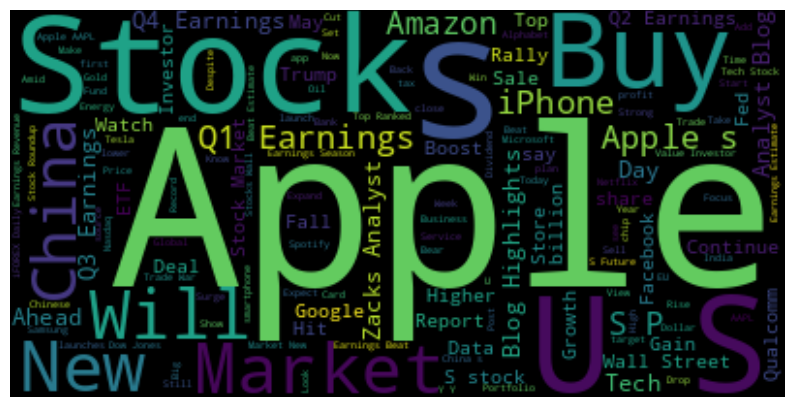

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_headlines = ' '.join(new_df['title'])

# Create a word cloud
wordcloud = WordCloud().generate(all_headlines)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Word Cloud for all the headlines...Apple, Buy, US, and Stocks are the most common words, which makes sense for these headlines.

<Figure size 20000x5000 with 0 Axes>

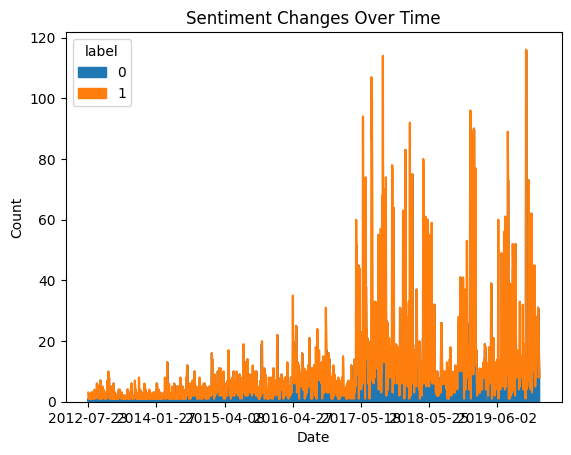

In [ ]:
plt.figure(figsize=(200, 50))
new_df.groupby('Date')['label'].value_counts().unstack().fillna(0).plot(kind='area', stacked=True)
plt.title('Label Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

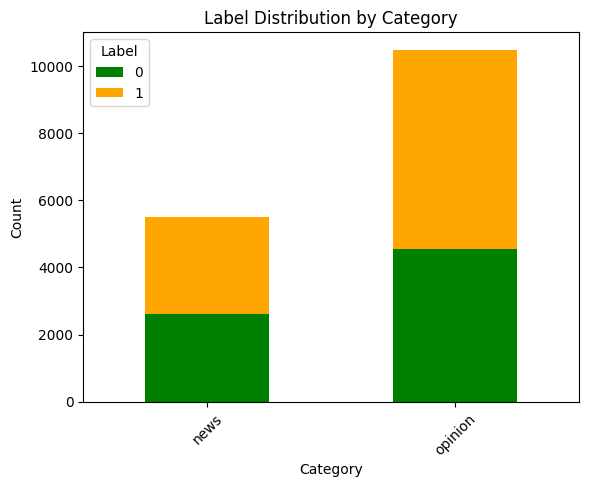

In [ ]:
sentiment_by_category = new_df.groupby('category')['label'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sentiment_by_category.plot(kind='bar', stacked=True, color=['green', 'orange'])
plt.title('Label Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()

Interestingly, both news and opinion have somewhat half and half split between positive and negative sentiment.

<ipython-input-40-ff69571ca03e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['title_length'] = new_df['title'].apply(len)


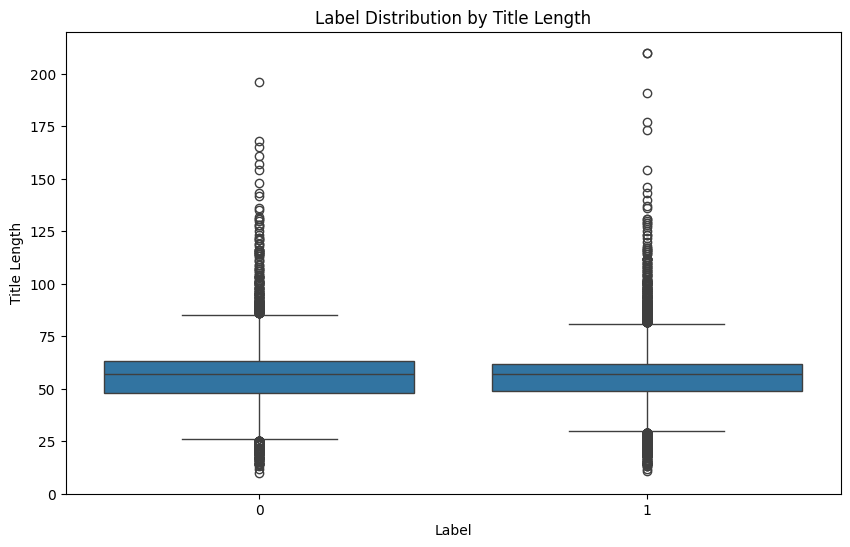

In [ ]:
import seaborn as sns

new_df['title_length'] = new_df['title'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df, x='label', y='title_length')
plt.title('Label Distribution by Title Length')
plt.xlabel('Label')
plt.ylabel('Title Length')
plt.show()

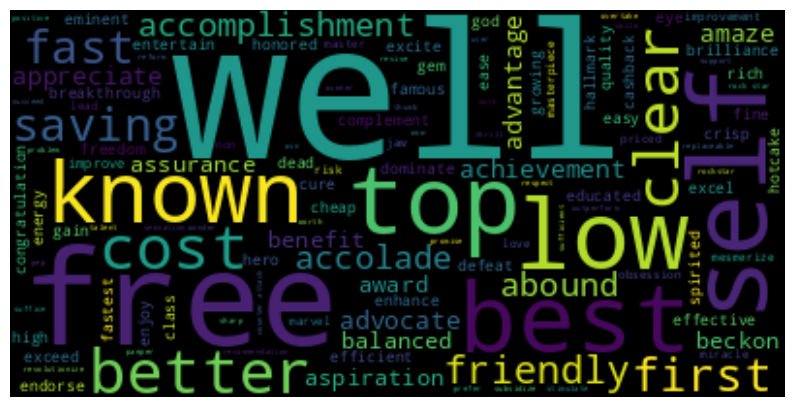

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
with open("positive-words.txt", "r") as file:
    positive_words = file.read()

# Create a word cloud
wordcloud = WordCloud().generate(positive_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Positive words word cloud

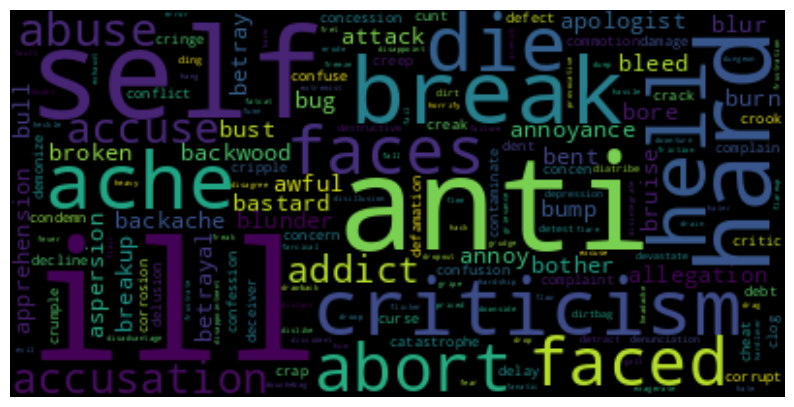

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
with open("negative-words.txt", "r") as file:
    positive_words = file.read()

# Create a word cloud
wordcloud = WordCloud().generate(positive_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Negative words word cloud